In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame. 
df= pd.read_csv(
    "Resources/crypto_market_data.csv")
    

# Display sample data
df.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Pre-processing - Get rid of nulls. Scaling the numeric columns using Use ONE-HOT to encode categories. None.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coin_id                       41 non-null     object 
 1   price_change_percentage_24h   41 non-null     float64
 2   price_change_percentage_7d    41 non-null     float64
 3   price_change_percentage_14d   41 non-null     float64
 4   price_change_percentage_30d   41 non-null     float64
 5   price_change_percentage_60d   41 non-null     float64
 6   price_change_percentage_200d  41 non-null     float64
 7   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


In [4]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# plot the data to see what the data looks like before proceeding.
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [6]:
df.columns

Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
num_features = [ 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

In [8]:
# subset
df_sub = df.loc[:, num_features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

# bring back coin_id
df_scaled["coin_id"] = df.coin_id

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


In [9]:
 df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Scaled Data.

In [10]:
# Define your "X" - features to predict
X = df_scaled.loc[:, num_features]
X.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [11]:
# Create a list with the number of k-values from 2 to 11

k = list(range(2, 11))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for-loop where each value of k is evaluated using the K-means algorithm
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics
    # Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [13]:
# Create a dictionary with the data to plot the Elbow curve. Higher the inertia, higher the gray area.

elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve.
df_elbow1 = pd.DataFrame(elbow_data)

df_elbow1["acc"] = df_elbow1.inertia.diff()


 
# the inertia is diminishing at a lower pace and I am already assuming the elbow won't be any good.
df_elbow1.head()

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879


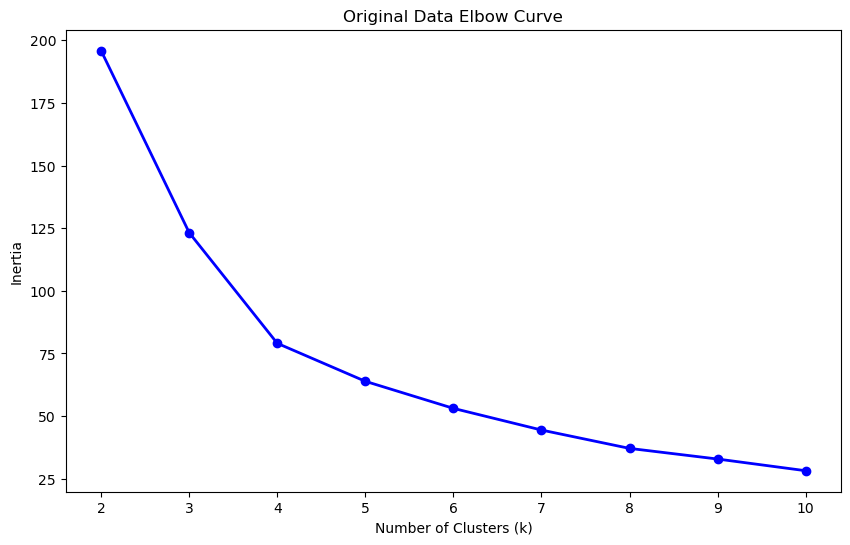

In [14]:
# As k value goes up because we are adding more clusters, the lowering of the inertia Values has diminished. 
#inertia is not good. 
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow1['k'], df_elbow1['inertia'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Original Data Elbow Curve")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: The silhoutte score is closest to 1 at k=3 and the Calinski score is highest at k=4. Either k=3 or k=4 could be the best. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model_n4 = KMeans(n_clusters=4, random_state=1)

# Fit the model
model_n4.fit(X)

# Make predictions
preds_n4 = model_n4.predict(X)

#Create a copy of the original data and add a new column with the predicted clusters.
df2_n4 = df_scaled.copy()
df2_n4['clusters'] = preds_n4
#
coin_id_n4= {
    0: 'bitcoin', 1: 'ethereum', 2: 'tether', 3: 'ripple', 4: 'bitcoin-Cash', 5: 'binancecoin', 6: 'chainlink',
    7: 'cardano', 8: 'litecoin', 9: 'bitcoin-cash-sv', 10: 'crypto-com-chain', 11: 'usd-coin', 12: 'eos',
    13: 'monero', 14: 'tron', 15: 'tezos', 16: 'okb', 17: 'stellar', 18: 'cosmos', 19: 'cdai', 20: 'neo',
    21: 'wrapped-bitcoin', 22: 'leo-token', 23: 'huobi-token', 24: 'nem', 25: 'binance-usd', 26: 'iota',
    27: 'vechain', 28: 'zcash', 29: 'theta-token', 30: 'dash', 31: 'ethereum-classic', 32: 'ethlend',
    33: 'maker', 34: 'havven', 35: 'omisego', 36: 'celsius-degree-token', 37: 'ontology', 38: 'ftx-token',
    39: 'true-usd', 40: 'digibyte'
}
# Add the "coin_id" column in the hover_cols parameter to identify the cryptocurrency represented by each data point.
df2_n4['coin_id'] = df2_n4['clusters'].map(coin_id_n4)
df2_n4.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,tether,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,tether,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,bitcoin,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,bitcoin,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,tether,2


In [16]:
#plot with clustering k=4
scatter_plot = df2_n4.hvplot.scatter(width=800,height=400, x='price_change_percentage_24h', y='price_change_percentage_7d', by='clusters', hover_cols=['coin_id'], title='Clustering with Original Data')
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [17]:
# Define the model with the next higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

#Create a copy of the original data and add a new column with the predicted clusters.
df2 = df_scaled.copy()
df2['clusters'] = preds

coin_id = {
    0: 'bitcoin', 1: 'ethereum', 2: 'tether', 3: 'ripple', 4: 'bitcoin-Cash', 5: 'binancecoin', 6: 'chainlink',
    7: 'cardano', 8: 'litecoin', 9: 'bitcoin-cash-sv', 10: 'crypto-com-chain', 11: 'usd-coin', 12: 'eos',
    13: 'monero', 14: 'tron', 15: 'tezos', 16: 'okb', 17: 'stellar', 18: 'cosmos', 19: 'cdai', 20: 'neo',
    21: 'wrapped-bitcoin', 22: 'leo-token', 23: 'huobi-token', 24: 'nem', 25: 'binance-usd', 26: 'iota',
    27: 'vechain', 28: 'zcash', 29: 'theta-token', 30: 'dash', 31: 'ethereum-classic', 32: 'ethlend',
    33: 'maker', 34: 'havven', 35: 'omisego', 36: 'celsius-degree-token', 37: 'ontology', 38: 'ftx-token',
    39: 'true-usd', 40: 'digibyte'
}
# Add the "coin_id" column in the hover_cols parameter to identify the cryptocurrency represented by each data point.

df2['coin_id'] = df2['clusters'].map(coin_id)
df2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,bitcoin,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,bitcoin,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,bitcoin,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin,0


In [18]:
#plot with clustering k=3
scatter_plot = df2.hvplot.scatter(width=800, height=400,x='price_change_percentage_24h', y='price_change_percentage_7d', by='clusters', hover_cols=['coin_id'], title='Clustering with k=3')
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [19]:
df2.clusters.value_counts()

clusters
0    39
1     1
2     1
Name: count, dtype: int64

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Instantiate the PCA instance and declare the number of PCA variables
num_pca = len(num_features)
pca = PCA(n_components=num_pca)

# Fit the PCA model on the transformed credit card DataFrame
data_pca = pca.fit_transform(df_scaled.loc[:, num_features])

# Create the PCA DataFrame
df_pca = pd.DataFrame(
    data_pca,
    columns=[f"PCA{x+1}" for x in range(num_pca)]
)

df_pca["coin_id"] = df_scaled.coin_id
df_pca.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,coin_id
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595,bitcoin
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593,ethereum
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857,tether
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870,ripple
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411,bitcoin-cash


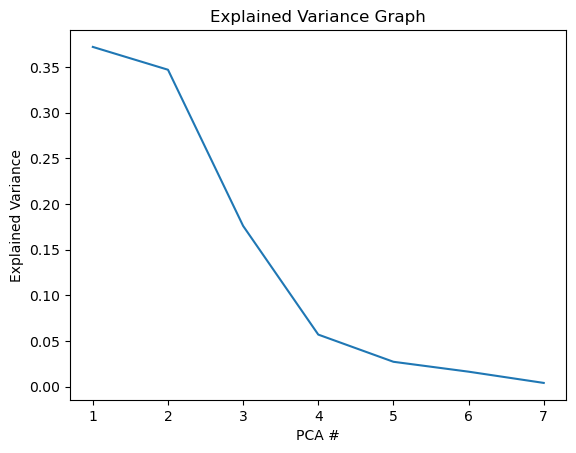

In [21]:
# Can we reduce the dimensions?
# Calculate the PCA explained variance ratio
exp_var = pca.explained_variance_ratio_

plt.plot(range(1, num_pca + 1), exp_var)
plt.title("Explained Variance Graph")
plt.xlabel("PCA #")
plt.ylabel("Explained Variance")
plt.xticks(range(1, num_pca + 1))
plt.show()

In [22]:
print("Explained Variance")
for i in range(len(exp_var)):
    val = exp_var[i]
    print(f"PCA{i+1}:", round(val, 3))

print()
print("CUMULATIVE Explained Variance")

exp_var_cum = np.cumsum(exp_var)
for i in range(len(exp_var_cum)):
    val = exp_var_cum[i]
    print(f"PCA{i+1}:", round(val, 3))

Explained Variance
PCA1: 0.372
PCA2: 0.347
PCA3: 0.176
PCA4: 0.057
PCA5: 0.027
PCA6: 0.016
PCA7: 0.004

CUMULATIVE Explained Variance
PCA1: 0.372
PCA2: 0.719
PCA3: 0.895
PCA4: 0.952
PCA5: 0.979
PCA6: 0.996
PCA7: 1.0


In [23]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca = PCA(n_components=3)
df3 = df_pca.loc[:, ["coin_id","PCA1", "PCA2", "PCA3", ]]
# View the first five rows of the DataFrame. 

df3.head()

,coin_id,PCA1,PCA2,PCA3
0,bitcoin,-0.600667,0.842760,0.461595
1,ethereum,-0.458261,0.458466,0.952877
2,tether,-0.433070,-0.168126,-0.641752
3,ripple,-0.471835,-0.222660,-0.479053
4,bitcoin-cash,-1.157800,2.041209,1.859715


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

---

### Find the Best Value for k Using the PCA Data

In [24]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
X= df3.loc[:, ["PCA1", "PCA2", "PCA3"]]


In [25]:
# Create a a list to store inertia valuesk=3
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    # Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")


Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [26]:
# Create a dictionary with the data to plot the Elbow curve. 
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve. 
df_elbow2 = pd.DataFrame(elbow_data)

df_elbow2["acc"] = df_elbow2.inertia.diff()
df_elbow2.head()

,k,inertia,silhouette_score,cha_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.072792,0.359902,51.722281,-11.592705
4,6,27.720626,0.401468,57.865728,-10.352166


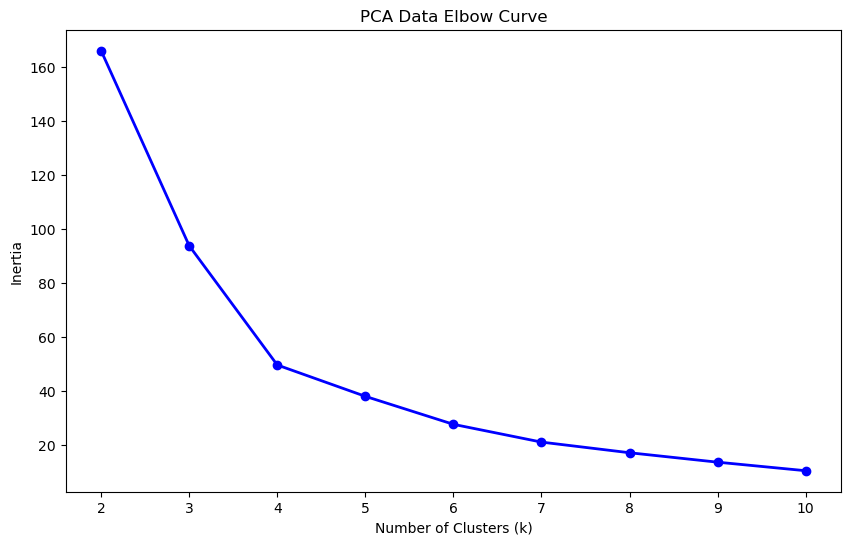

In [27]:
# inertia is not good. As k value goes up because we are adding more clusters, the #inertia is diminishing at a lower pace.
# The elbow won't be any good.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow2['k'], df_elbow2['inertia'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title("PCA Data Elbow Curve")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best model is k=4.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No the best k value using the original data was also k=4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

#Create a copy of the original data and add a new column with the predicted clusters.
df4 = df3.copy()
df4['clusters'] = preds

df4.head()

,coin_id,PCA1,PCA2,PCA3,clusters
0,bitcoin,-0.600667,0.842760,0.461595,2
1,ethereum,-0.458261,0.458466,0.952877,2
2,tether,-0.433070,-0.168126,-0.641752,0
3,ripple,-0.471835,-0.222660,-0.479053,0
4,bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
# Create a scatter plot using hvPlot 
scatter_plot = df4.hvplot.scatter(x='PCA1', y='PCA2', by='clusters', hover_cols=['coin_id'], title='Clustering with PCA Data')
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
# Create a figure with two subplots

# Create line plots for the two elbow curves
elbow_plot1 = df_elbow1.hvplot.line(x='k', y='inertia', title='Original Data Elbow Curve', width=400, height=400)
elbow_plot2 = df_elbow2.hvplot.line(x='k', y='inertia', title='PCA Data Elbow Curve',width=400, height=400 )

# Create a composite plot to contrast the two elbow curves
composite_elbow_plot = elbow_plot1 + elbow_plot2
composite_elbow_plot


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [31]:
# Composite plot to contrast the clusters
# Create a figure with two subplots

# Scatter plot for n=4 clusters on the original data
scatter_plot_n4 = df2_n4.hvplot.scatter(width=400, height=400, x='price_change_percentage_24h', y='price_change_percentage_7d', by='clusters', hover_cols=['coin_id'], title='Clustering with Original Data')

# # Scatter plot for n=4 clusters on the PCA data

scatter_plot = df4.hvplot.scatter(width=400, height=400, x='PCA1', y='PCA2', by='clusters', hover_cols=['coin_id'], title='Clustering with PCA Data')


# Create a composite plot to contrast the clusters on two scatter plots
composite_plot = scatter_plot_n4 + scatter_plot
composite_plot



:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The higher variance explained by the two components (PCA1 and PCA2) suggests that these two components capture a significant amount of information from the original data, potentially making them more effective for clustering.  Further, less features are more independent and a must for linear regression models to identify patterns. 